<a href="https://colab.research.google.com/github/IlhamFaturachman/pcvk-ganjil-2025/blob/main/week1_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

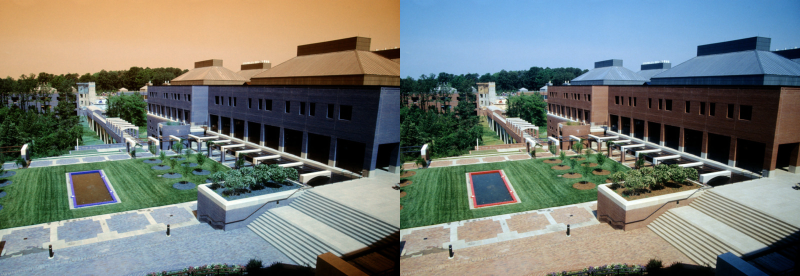

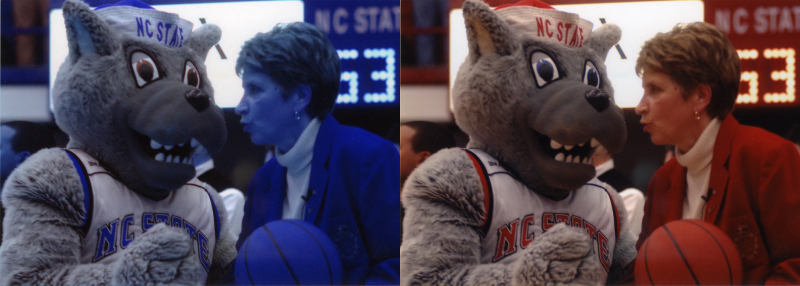

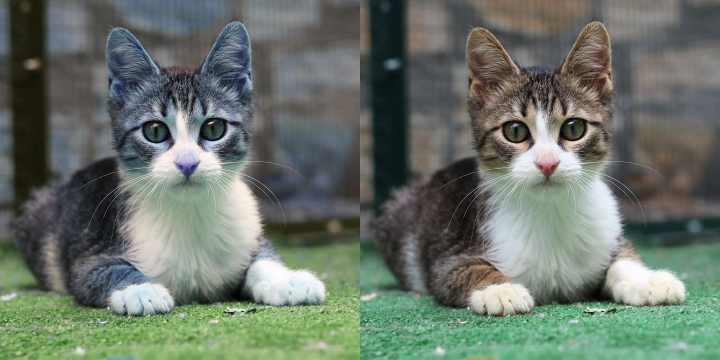

In [12]:
# Membuat list untuk menyimpan url dari beberapa image
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://media.4-paws.org/d/2/5/f/d25ff020556e4b5eae747c55576f3b50886c0b90/cut%20cat%20serhio%2002-1813x1811-720x719.jpg"]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
  image = io.imread(url) #read image
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5) #resize image to half size
  image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB) #convert color to RGB
  final_frame = cv.hconcat ((image, image_2)) #concatenate image
  cv2_imshow(final_frame) #show image
  print('\n')

resolusi image: tinggi x lebar =  360  x  360


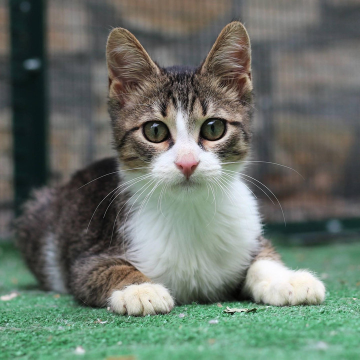

In [9]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(image_2)

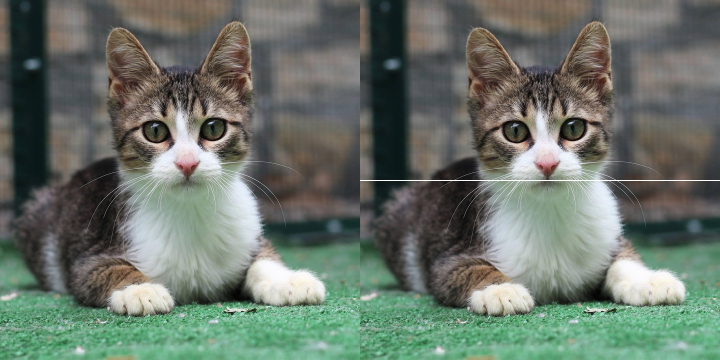

In [10]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuat garis horizontal ditengah image
for y in range(lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

#Jawaban

1. Karena praktis dan gratis, serta membutuhkan zero setup tidak perlu setup python terlebih dahulu dll.

2. Penjelasan tiap library

* NumPy (Numerical Python) adalah library fundamental untuk komputasi numerik di Python.
* Pandas adalah library untuk analisis dan manipulasi data terstruktur, seperti tabel (mirip spreadsheet Excel).
* OpenCV (Open Source Computer Vision Library) adalah library paling populer untuk tugas-tugas computer vision (visi komputer).
* from google.colab.patches import cv2_imshow adalah fungsi khusus yang disediakan oleh Google Colab.
* Scikit-image adalah library lain untuk pemrosesan gambar, yang terintegrasi erat dengan ekosistem scientific Python (NumPy, SciPy, Matplotlib).
* Pillow (fork dari PIL - Python Imaging Library) adalah library lain untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar.
* Matplotlib adalah library yang sangat populer untuk membuat visualisasi data, seperti grafik, plot, dan histogram di Python.
Apakah semua library digunakan? jawabannya adalah tidak semua dikarenakan pada praktikum diatas kita hanya menggunakan opencv, numpy, dan dari google colab

3. Fungsi nya adalah untuk meresize gambar menjadi lebih kecil setengah dari gambar aslinya secara horizontal dan vertikal, dan jika tidak dilakukan gambarnya tidak akan mengecil

4. Fungsinya adalah memberi warna putih pada garis yang nanti akan ditaruh ditengah layar

5. Pixel adalah elemen terkecil penyusun gambar digital, sedangkan resolusi menunjukkan jumlah pixel yang membentuk gambar tersebut dalam arah lebar dan tinggi. Semakin tinggi resolusi, semakin banyak jumlah pixel sehingga gambar tampak lebih tajam dan detail. Sebaliknya, resolusi rendah berarti jumlah pixel lebih sedikit sehingga gambar terlihat buram atau pecah ketika diperbesar.

# Tugas

## Buat garis vertikal dan garis menyilang diagonal pada image keluaran

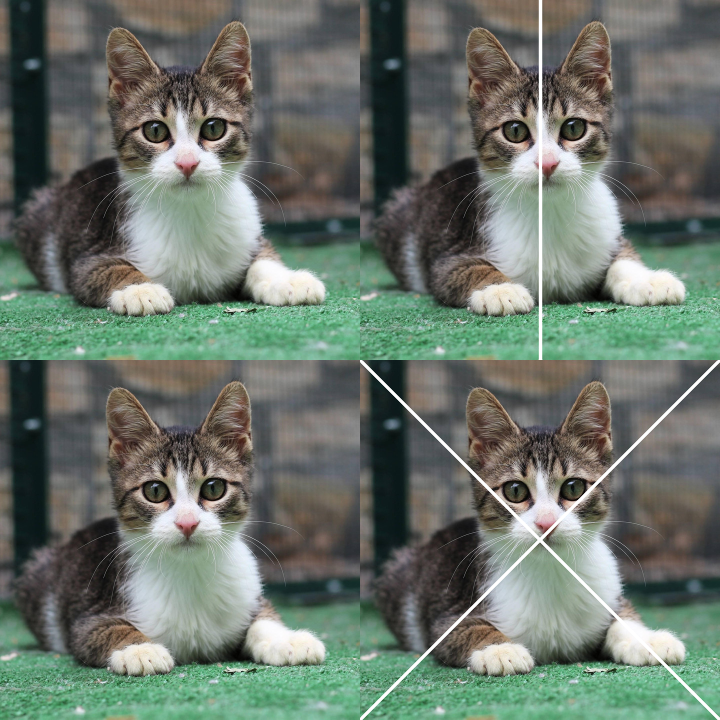

In [20]:
# Membuat list untuk menyimpan url dari beberapa image
urls = "https://media.4-paws.org/d/2/5/f/d25ff020556e4b5eae747c55576f3b50886c0b90/cut%20cat%20serhio%2002-1813x1811-720x719.jpg"

image = io.imread(urls) #read image
image = cv.resize(image, (0,0), fx=0.5, fy=0.5) #resize image to half size
image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB) #convert color to RGB
final_frame = cv.hconcat((image_2, image_2))

# Ukuran gambar
h, w = image_2.shape[:2]

# Salin gambar
img_ori1 = image_2.copy()
img_ori2 = image_2.copy()

# Gambar garis vertikal di tengah
img_vert = image_2.copy()
cv.line(img_vert, (w//2, 0), (w//2, h-1), (255, 255, 255), thickness=2, lineType=cv.LINE_AA)

# Gambar garis diagonal menyilang
img_diag = image_2.copy()
cv.line(img_diag, (0, 0), (w-1, h-1), (255, 255, 255), thickness=2, lineType=cv.LINE_AA)
cv.line(img_diag, (w-1, 0), (0, h-1), (255, 255, 255), thickness=2, lineType=cv.LINE_AA)

# Gabungkan jadi 4 gambar: (ori - vertikal) dan (ori - diagonal)
row1 = cv.hconcat((img_ori1, img_vert))
row2 = cv.hconcat((img_ori2, img_diag))
final_frame = cv.vconcat((row1, row2))

# Tampilkan
cv2_imshow(final_frame)


## Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang tertentu

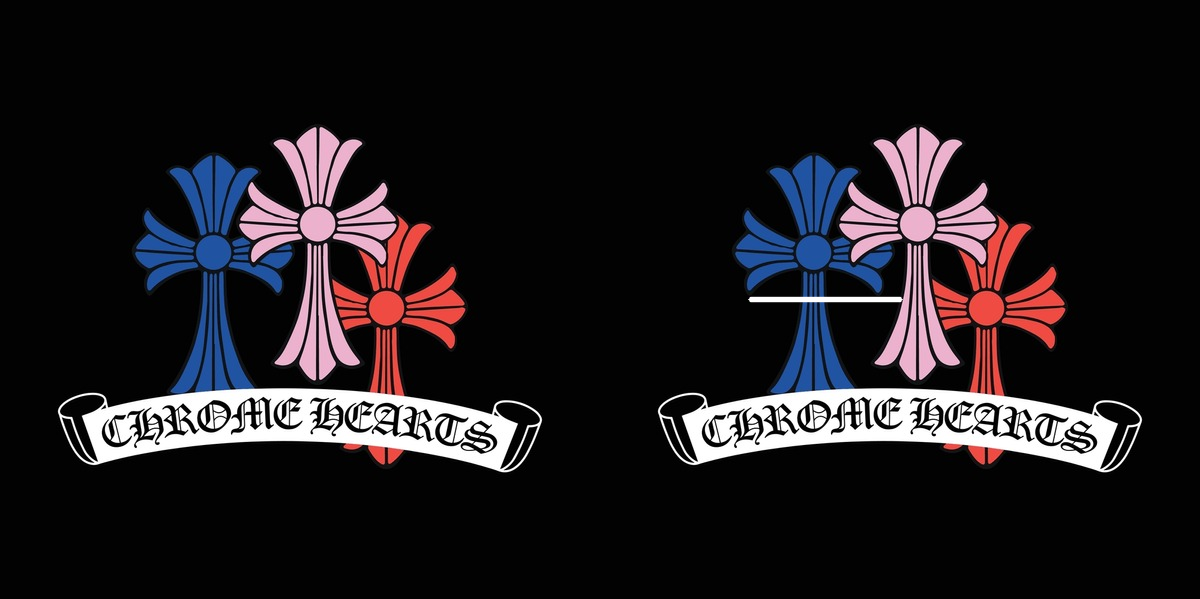

In [42]:
# Membuat list untuk menyimpan url dari beberapa image# Membuat list untuk menyimpan url dari beberapa image
urls = "https://www.shutterstock.com/image-vector/american-fashion-brand-has-chosen-600nw-2489609919.jpg"
image = io.imread(urls) #read image
image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB) #convert color to RGB

# Ambil ukuran gambar
h, w = image_2.shape[:2]

# Copy gambar untuk digambar garis
img_hor = image_2.copy()

# Titik awal dan akhir garis (di tengah, dengan panjang setengah lebar)
start_x = w//2            # mulai 1/4 dari kiri
end_x   = 1*w//4          # sampai 3/4 dari kiri
y_mid   = h//2            # posisi vertikal di tengah

# Gambar garis horizontal putih
cv.line(img_hor, (start_x, y_mid), (end_x, y_mid), (255, 255, 255), thickness=3, lineType=cv.LINE_AA)

# Gabungkan: kiri original, kanan dengan garis
final_frame = cv.hconcat((image_2, img_hor))
cv2_imshow(final_frame)


## Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam gambar

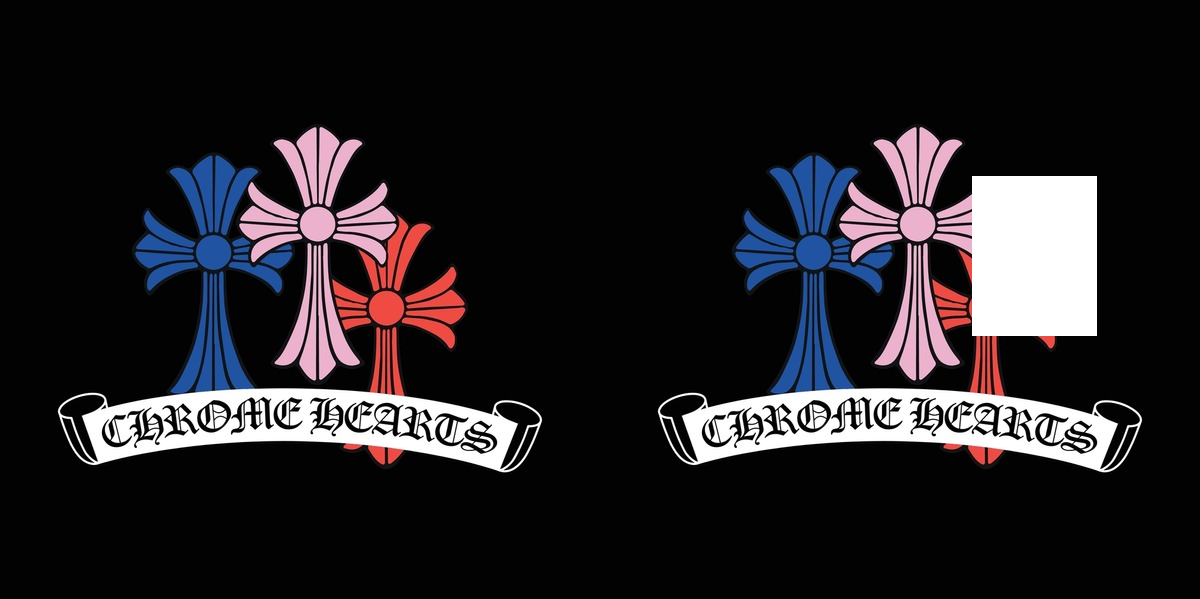

In [47]:
# Membuat list untuk menyimpan url dari beberapa image# Membuat list untuk menyimpan url dari beberapa image
urls = "https://www.shutterstock.com/image-vector/american-fashion-brand-has-chosen-600nw-2489609919.jpg"
image = io.imread(urls) #read image
image_2 = cv.cvtColor (image, cv.COLOR_BGR2RGB) #convert color to RGB

h, w = image_2.shape[:2]
img_box = image_2.copy()

# Parameter kotak
thickness = 3  # ketebalan garis kotak (pixel)
min_frac, max_frac = 0.15, 0.35  # kisaran fraksi ukuran kotak relatif ke dimensi gambar

# Tentukan ukuran kotak secara acak (antara 15% - 35% dari dimensi)
rng = np.random.default_rng()  # pakai seed jika ingin deterministik, misal: np.random.default_rng(42)
box_w = int(rng.uniform(min_frac, max_frac) * w)
box_h = int(rng.uniform(min_frac, max_frac) * h)

# Tentukan posisi kiri-atas acak, pastikan kotak masih muat di dalam gambar
x1 = rng.integers(0, max(1, w - box_w))
y1 = rng.integers(0, max(1, h - box_h))
x2 = x1 + box_w
y2 = y1 + box_h

# Warna putih (RGB)
WHITE = (255, 255, 255)

# Isi area kotak dengan warna putih
img_box[y1:y2, x1:x2] = (255, 255, 255)

# Tampilkan berdampingan: kiri ori, kanan dengan kotak
final_frame = cv.hconcat((image_2, img_box))
cv2_imshow(final_frame)